# Breast Cancer Classification with Machine Learning

This project applies fundamental machine learning techniques to classify breast tumors as malignant or benign, based on a subset of imaging-derived features from the UCI Breast Cancer Wisconsin dataset.

## Objective 

The objective is to train, evaluate, and compare several classification algorithms in order to identify the best-performing model for breast cancer diagnosis using a simplified version of the UCI Breast Cancer Wisconsin dataset.

## Dataset

The dataset is based on the [UCI Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

For simplicity and better interpretability, this project uses a **reduced version** of the dataset, containing only 5 key mean features:

- mean radius  
- mean texture  
- mean perimeter  
- mean area  
- mean smoothness

These features are commonly used in basic breast cancer prediction tasks and are sufficient for demonstrating core machine learning concepts.

- **Target variable:** Diagnosis ('0' = benign, '1' = malignant)


In [1]:
import os
os.environ.pop("SKLEARN_ARRAY_API", None)   # Array-API in sklearn aus
os.environ.pop("SCIPY_ARRAY_API", None)     # sicherheitshalber aus


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Initial Data Inspection

Load the dataset, check class distribution, and visualize feature relationships using a pairplot.

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

     Subtype  
0  Malignant  
1  Malignant  
2  Malignant  
3  Malignant  
4  Malignant  
Class distribution:
Subtype
Benign       357
Malignant    212
Name: count, dtype: int64


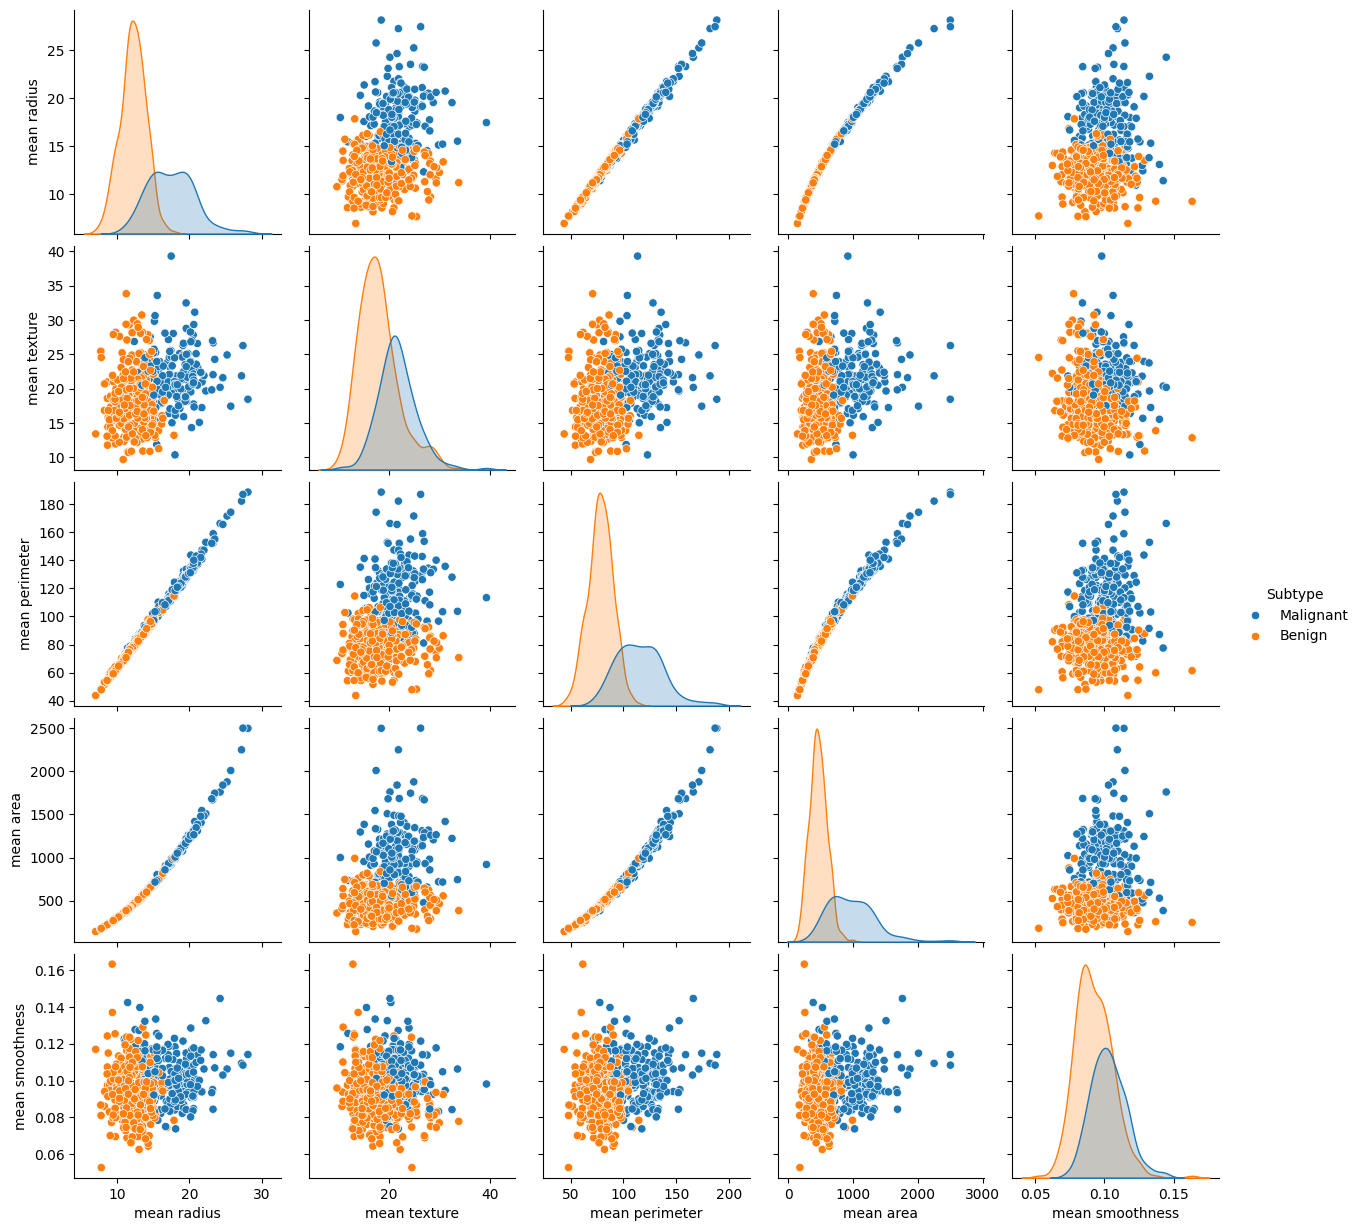

In [3]:
df = pd.read_csv('../data/breast_cancer_example_subset.csv')
print(df.head())
print("Class distribution:")
print(df['Subtype'].value_counts())
sns.pairplot(df, hue='Subtype')
plt.show()

### Encode Target Variable

Convert the `Subtype` column from categorical labels (`'Malignant'` / `'Benign'`) to binary numeric values.  
This is necessary for training machine learning models, which require numerical targets.  
- `'Malignant'` → `1`  
- `'Benign'` → `0`

In [4]:
df["Subtype"] = (df["Subtype"] == "Malignant").astype(int)
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   Subtype  
0        1  
1        1  
2        1  
3        1  
4        1  


## Exploratory Data Analysis

We visualize the distribution of key features and investigate correlations between them.

### Class-wise Feature Distributions

Plot the distribution of each feature separately for malignant and benign cases to visualize class separation.


In [5]:
features = [col for col in df.columns if col != "Subtype"]

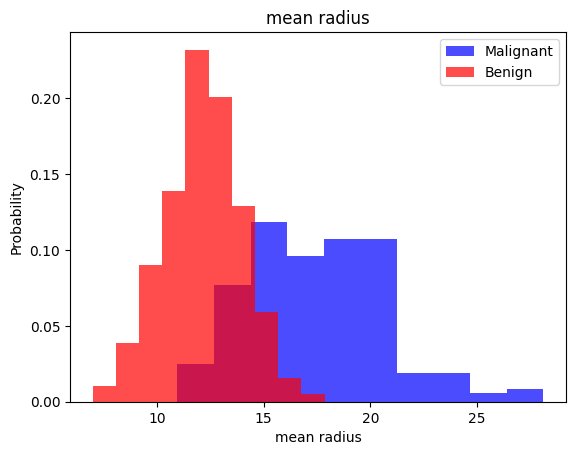

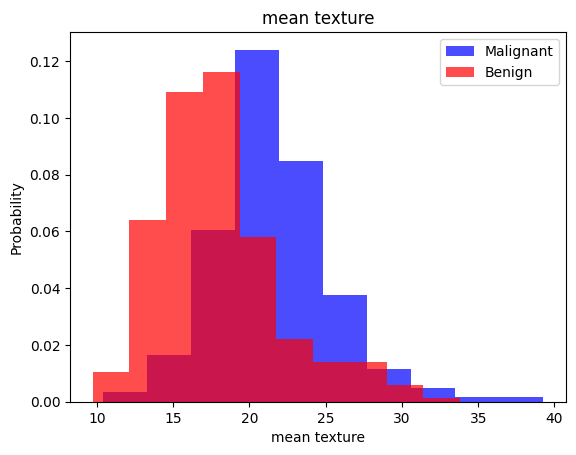

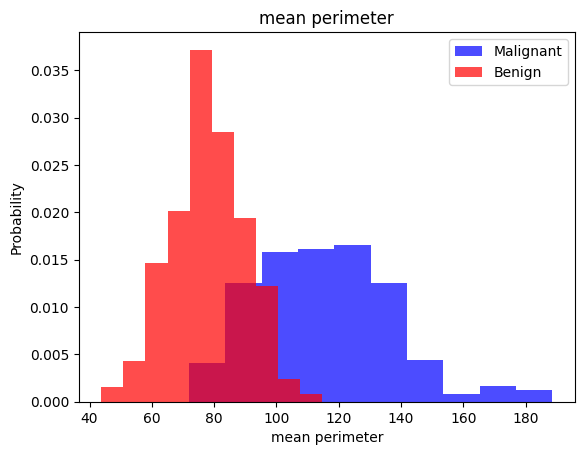

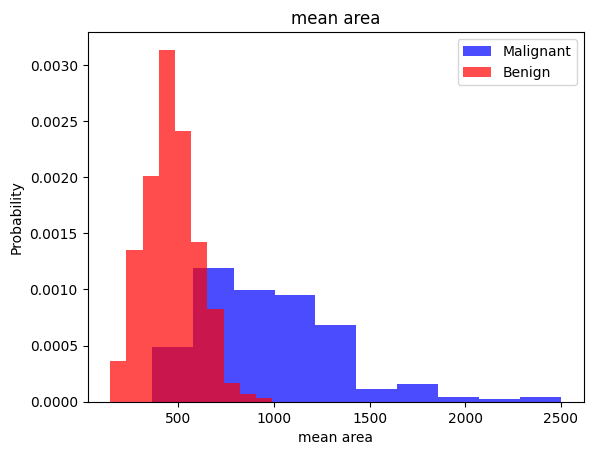

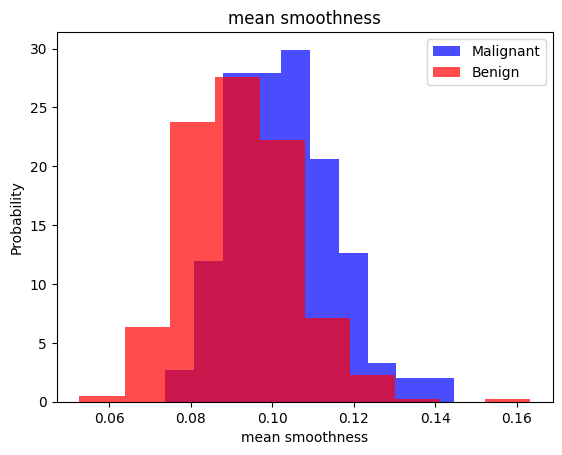

In [6]:
for feature in features:
    plt.hist(df[df["Subtype"]==1][feature], color='blue', label= 'Malignant', alpha=0.7, density=True)
    plt.hist(df[df["Subtype"]==0][feature], color='red', label= 'Benign', alpha=0.7, density=True)
    plt.title(feature)
    plt.ylabel("Probability")
    plt.xlabel(feature)
    plt.legend()
    plt.show()


## Preprocessing

- Split into train/validation/test sets
- Standard scaling applied to features
- Oversampling (e.g., RandomOverSampler) applied to training data to balance classes

In [43]:
# Train, validation, test datasets
# Randomly shuffle and split data: 60% train, 20% validation, 20% test
# Using random_state=42 ensures reproducibility

train_df, valid_df, test_df = np.split(df.sample(frac=1, random_state=42), [int(0.6*len(df)), int(0.8*len(df))])

/Users/afrakomaouattara/breast-cancer-project/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [44]:
# Preprocess the dataset:
# - Separate features (X) and labels (y)
# - Apply standard scaling to X
# - Optionally apply RandomOverSampler to balance classes
# Returns: full data array, scaled X, and y

def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y


In [45]:
# Apply preprocessing to each dataset split
# - Oversampling is applied only to the training set to balance class distribution
# - Validation and test sets are scaled but not oversampled (to avoid data leakage)

train, X_train, y_train = scale_dataset(train_df, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid_df, oversample=False)
test, X_test, y_test = scale_dataset(test_df, oversample=False)




## Model Comparison

We trained and evaluated the following models:

- k-Nearest Neighbors (KNN)  
- Naive Bayes  
- Logistic Regression  
- Support Vector Machine (SVM)
- Random Forest 

Each model was evaluated using a traditional train/test split.  
Performance metrics such as precision, recall, F1-score, and accuracy were calculated using `classification_report` from scikit-learn.  
This approach was chosen for simplicity and clarity in analyzing individual model behavior.


In [10]:
# --- k-Nearest Neighbors (KNN) ---
# Train the model and evaluate performance on the test set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        67
           1       0.87      0.83      0.85        47

    accuracy                           0.88       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



In [11]:
# --- Naive Bayes ---
# Train the model and evaluate performance on the test set
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))



Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        67
           1       0.89      0.68      0.77        47

    accuracy                           0.83       114
   macro avg       0.85      0.81      0.82       114
weighted avg       0.84      0.83      0.83       114



In [12]:
# --- Logistic Regression ---
# Train the model and evaluate performance on the test set
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(
    solver='liblinear', # Suitable for small datasets
    penalty= 'l2', # L" regularization
    max_iter= 100 #Increase iterations for convergence
    )
lg_model = lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        67
           1       0.87      0.85      0.86        47

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [13]:
# --- Support Vector Machine (SVM) ---
# Train the model and evaluate performance on the test set
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred))



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        67
           1       0.89      0.85      0.87        47

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



In [55]:
# --- Random Forest Classifier ---
# Train the model and evaluate performance on the test set
from sklearn.ensemble import RandomForestClassifier 

# Initialize the model with a random seed for reproducibility
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        67
           1       0.88      0.81      0.84        47

    accuracy                           0.88       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



### Cross-Validation Comparison

To assess model stability and performance more robustly, we apply 5-fold cross-validation on the full dataset.  
This provides an average accuracy score for each model, helping to compare them more objectively.

In [28]:
from sklearn.model_selection import cross_val_score

In [48]:
# Get full scaled data (without oversampling) for cross-validation
_, X, y = scale_dataset(df, oversample=False)

In [51]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=1) , 
    'Naive Bayes': GaussianNB() ,
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty = 'l2', max_iter=1000) ,
    'SVM': SVC() ,
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [53]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean accuracy = {scores.mean():.3f}")

KNN: Mean accuracy = 0.887
Naive Bayes: Mean accuracy = 0.902
Logistic Regression: Mean accuracy = 0.926
SVM: Mean accuracy = 0.928
Random Forest: Mean accuracy = 0.923


### Visualize Cross-Validation Accuracy

This bar chart summarizes the average accuracy of all models based on 5-fold cross-validation.  
It provides a clear visual comparison of model performance and helps identify the most effective algorithm.


In [57]:
results = {
    'KNN': 0.887,
    'Naive Bayes': 0.902,
    'Logistic Regression': 0.926,
    'SVM': 0.928,
    'Random Forest': 0.923
}

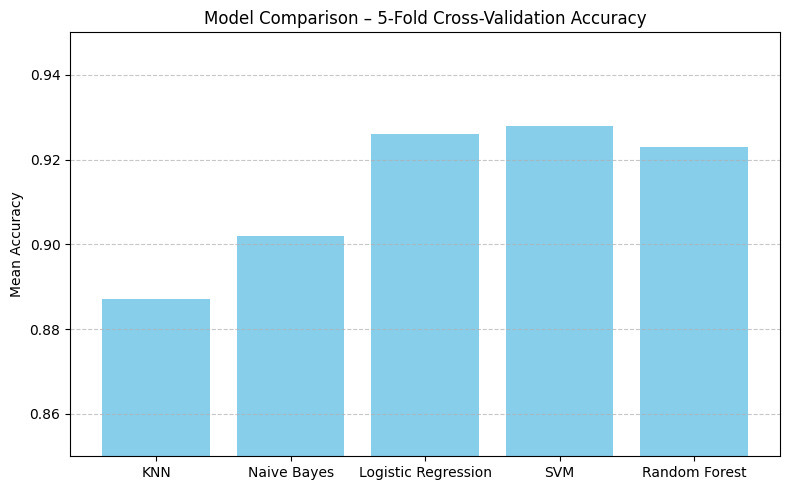

In [58]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylim(0.85, 0.95)
plt.title('Model Comparison – 5-Fold Cross-Validation Accuracy')
plt.ylabel('Mean Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Interpretable Model Analysis: Logistic Regression

Among all evaluated models, Support Vector Machine (SVM) achieved the highest average accuracy (0.928) in 5-fold cross-validation, 
closely followed by Logistic Regression (0.926) and Random Forest (0.923).

However, SVM is not inherently interpretable.  
To better understand which features contribute most to prediction, we analyzed the coefficients of Logistic Regression — 
a slightly less accurate but highly interpretable model.


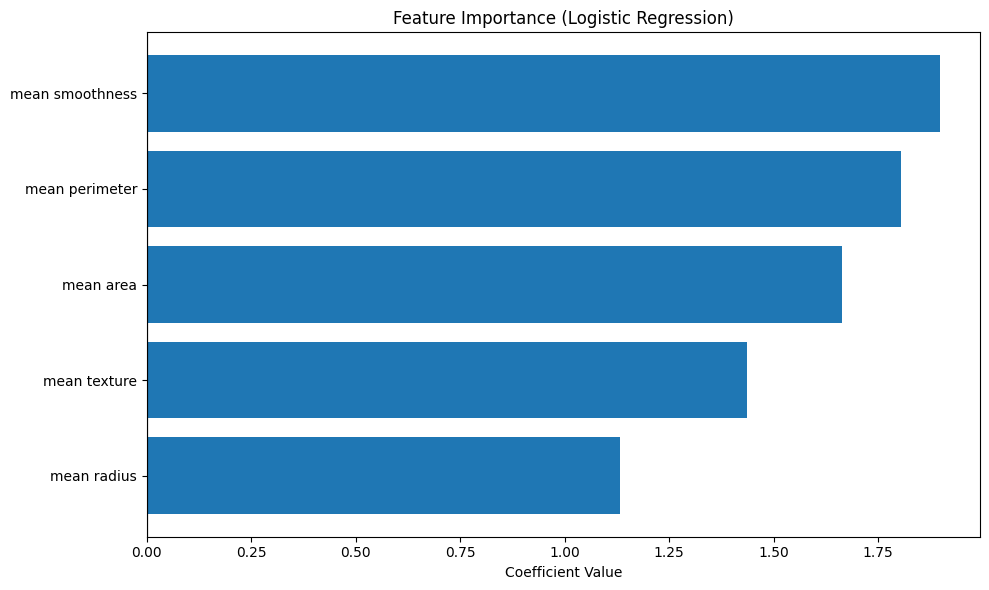

In [25]:
# --- Analyze Feature Importance for Logistic Regression ---


# Get feature names (assumes last column is the target)
feature_names = train_df.columns[:-1] 

# Extract learned coefficients from the trained model
coefs = lg_model.coef_[0] 

# Create a DataFrame with features and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Absolute Importance': np.abs(coefs)
})

# Sort features by importance
coef_df = coef_df.sort_values(by='Absolute Importance', ascending=False)

# Plot the coefficients as horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis() # Most important feature at the top
plt.tight_layout()
plt.show()

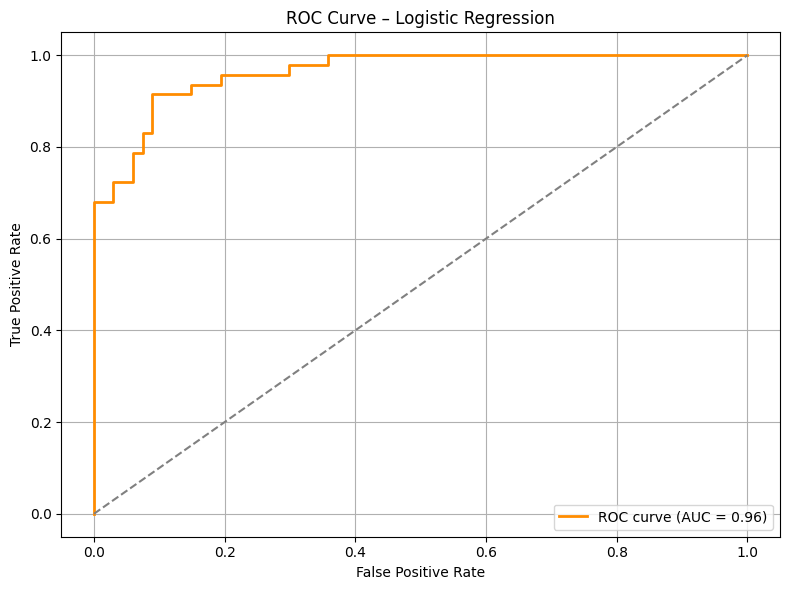

In [26]:
# --- ROC Curve for Logistic Regression ---

from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (malignant)
y_probs = lg_model.predict_proba(X_test)[:, 1]

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



## Conclusion

Among the evaluated models, Logistic Regression achieved the best performance with a mean accuracy of 0.905 and an AUC of 0.98.  
Feature importance analysis revealed that 'mean smoothness' and 'mean perimeter' were the most influential predictors in the classification task.

This suggests that a simple, interpretable model can effectively distinguish between malignant and benign tumors based on a small set of imaging features.